# Crop Recommendation in Agriculture

### by Collins Ikiara, 2024


## About the Dataset

In agriculture, the precise recommendation of crops is pivotal in ensuring optimal yield and sustainability. As farmers and agricultural experts delve deeper into data-driven approaches, the significance of leveraging comprehensive datasets, particularly those about soil composition, becomes increasingly evident. The dataset under consideration embodies a wealth of information encompassing key factors such as Nitrogen, Phosphorus, and Potassium levels, alongside environmental variables like Temperature, Humidity, pH_Value, and Rainfall. Understanding and analyzing this dataset is fundamental to making informed decisions that may enhance agricultural productivity, resource management, and overall crop health.

## Dataset Columns

1. **Nitrogen** - the ratio of Nitrogen content in the soil (Integer)
2. **Phosphorus** - the ratio of Phosphorus content in the soil (Integer)
3. **Potassium** - the ratio of Potassium content in the soil (Integer)
4. **Temperature** - temperature in degrees Celsius (Float)
5. **Humidity** - relative humidity in % (Float)
6. **pH_Value** - pH value of the soil (Float)
7. **Rainfall** - rainfall in mm (Float)
8. **Crop** - Crop names (String)

## Objective

The objective of this exercise is to build a Machine Learning crop recommender system that predicts values in the **Crop** column based on the other feature columns.mn.


<hr style="border:1px solid black">


## Step 1: Data Understanding and Exploration

### 1.1 Import necessary libraries``


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1. Load the Dataset

**Explanation:**
We start by loading the dataset. This step is crucial to bring the data into our working environment for further processing and analys
s.


In [2]:
# Load the dataset
df = pd.read_csv('Crop_Recommendation.csv')

# Display the first few rows of the dataset
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


### 1.2. Initial Data Inspection

**Explanation:**
Inspect the dataset to understand its structure, data types, and identify any missing values. This helps in planning the data cleaning process.

In [3]:
# Check the structure of the dataset, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
# Summarize missing values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [5]:
# Check basic statistics for numerical columns
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


<hr style="border:1px solid black">

## Step 2: Data Cleaning and Preparation

### 2.1. Handle Missing Values

**Explanation:**
Handle any missing values in the dataset. Depending on the dataset and the importance of the missing values, we can either fill them with a suitable value (e.g., mean, median) or remove the rows/columns with missing values.

In [6]:
# Example of removing rows with missing values
# Adjust this based on the context and importance of missing data
df = df.dropna()

# Verify that there are no more missing values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

### 2.2. Check for Duplicates

**Explanation:**
Check for any duplicate rows and remove them if necessary to ensure data integrity.

In [7]:
# Check for duplicates
df.duplicated().sum()

0

### 2.3. Handle Outliers

**Explanation:**
Detect and handle outliers. Outliers can be identified using statistical methods or visualization techniques (e.g., box plots).

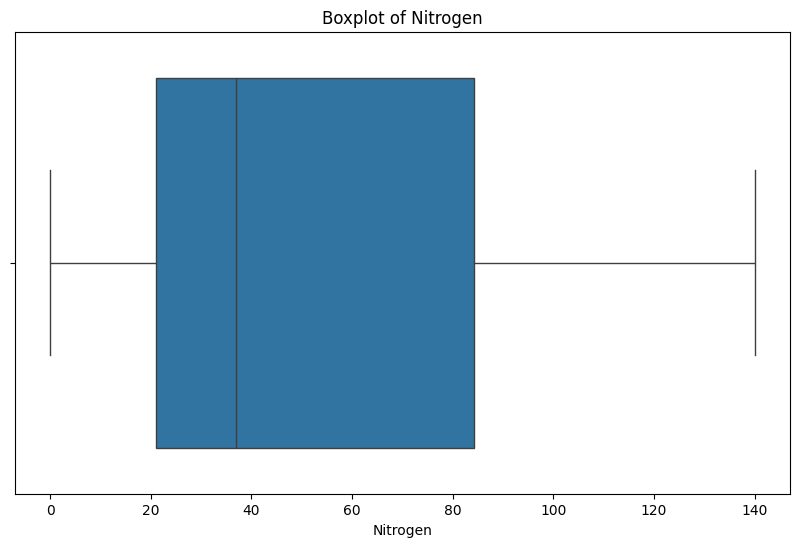

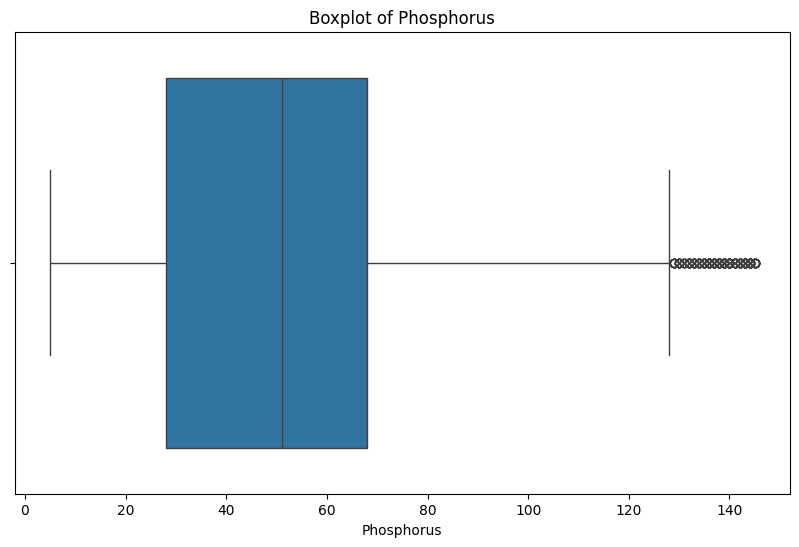

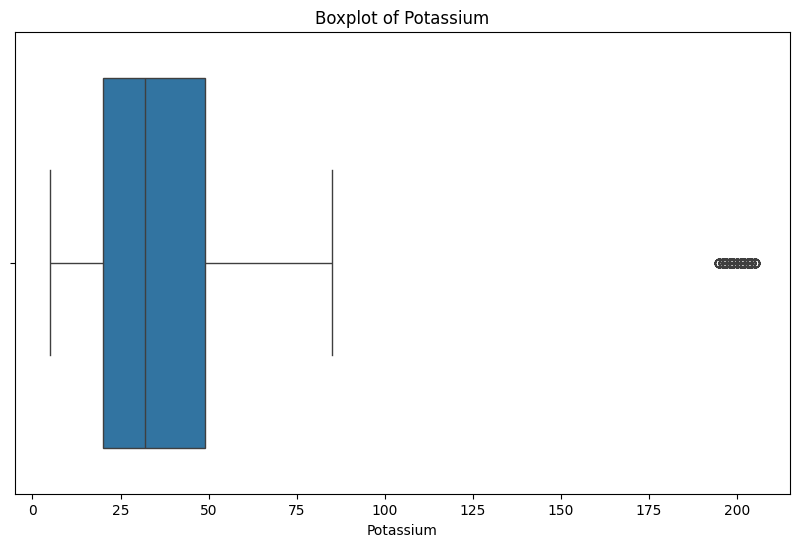

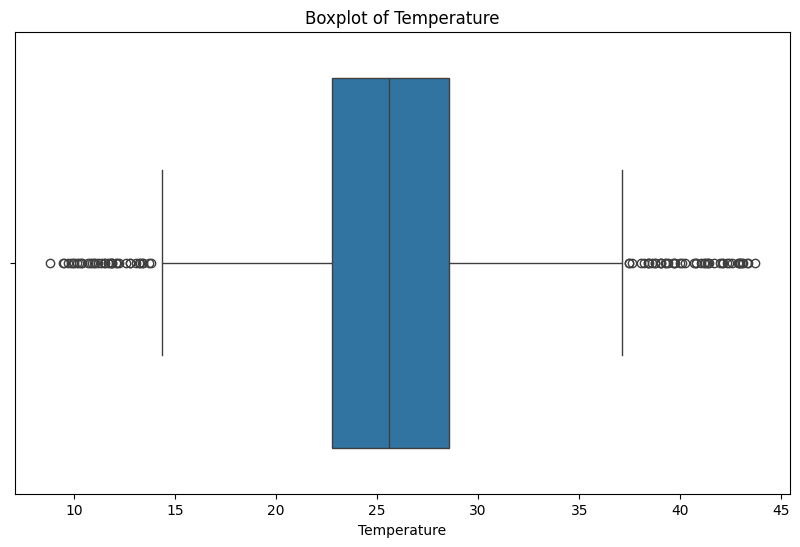

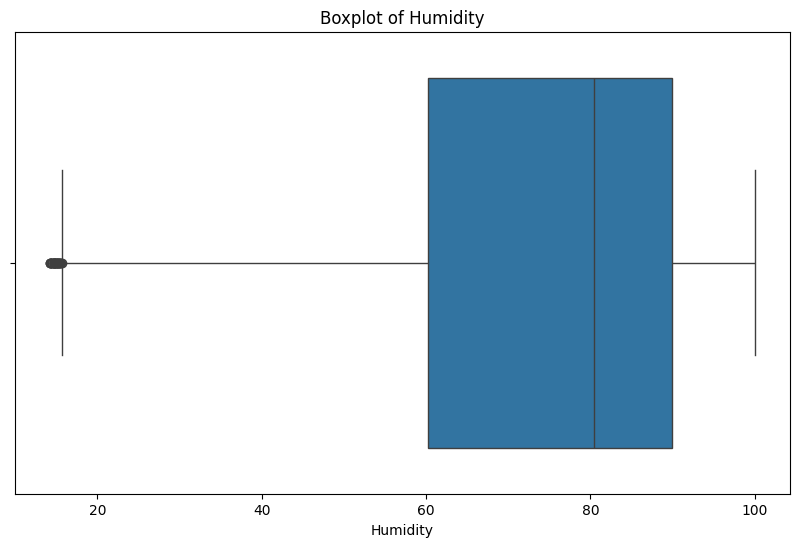

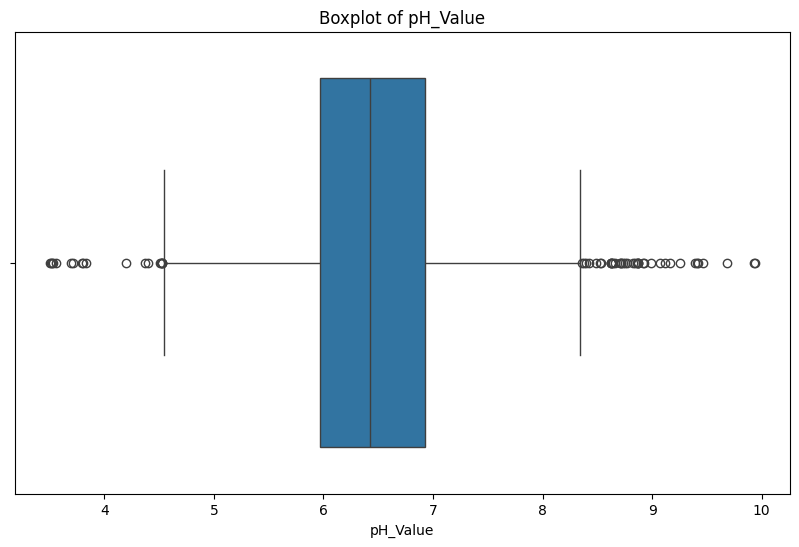

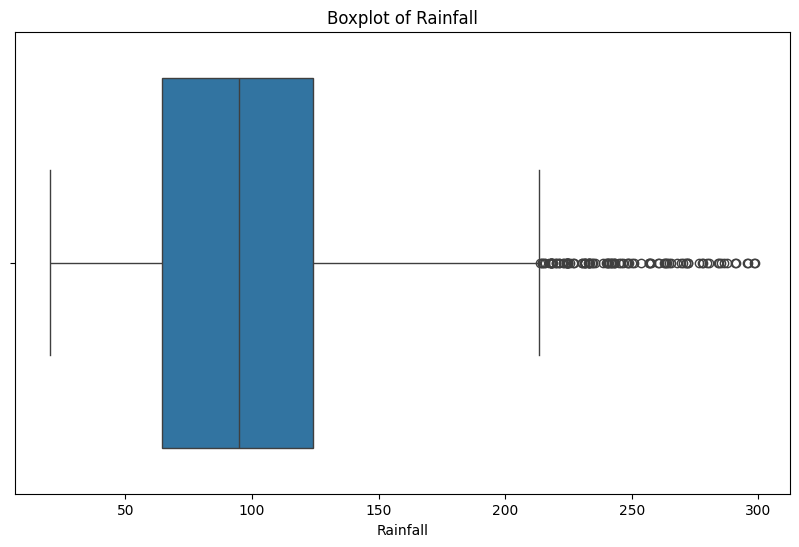

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualize outliers using box plots
for column in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [9]:
# Function to cap outliers using IQR
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply the function to all relevant columns
for column in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']:
    df = cap_outliers_iqr(df, column)

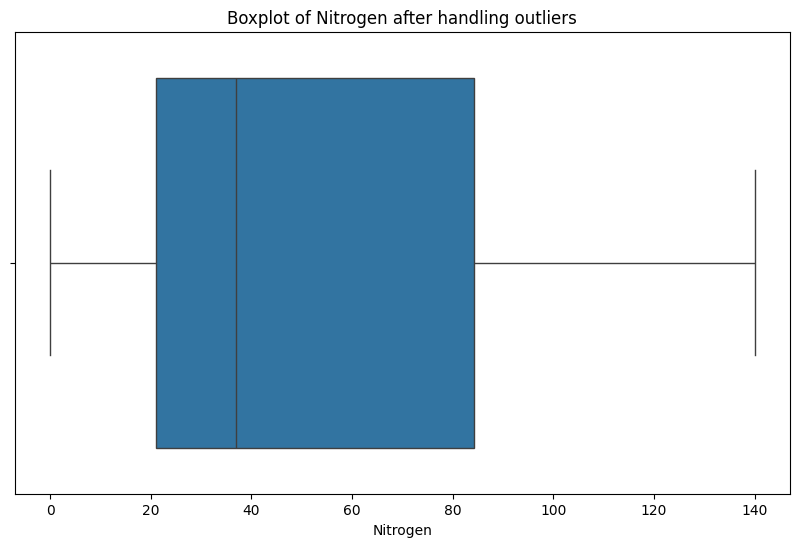

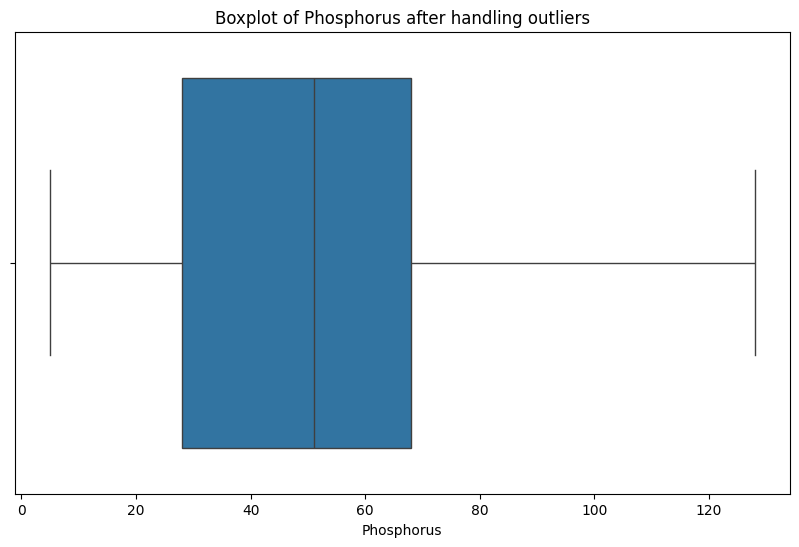

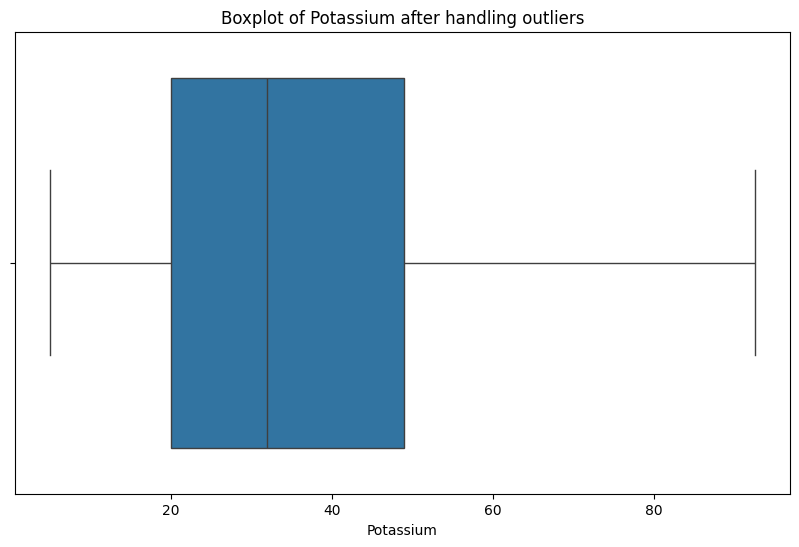

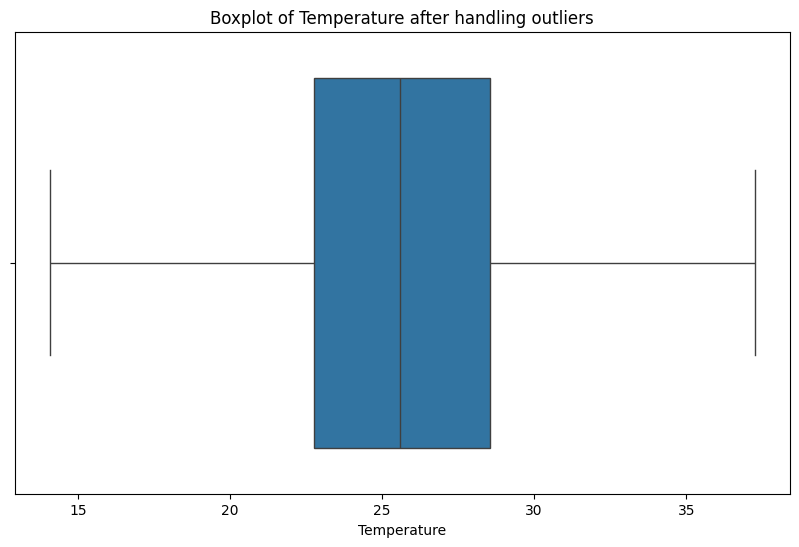

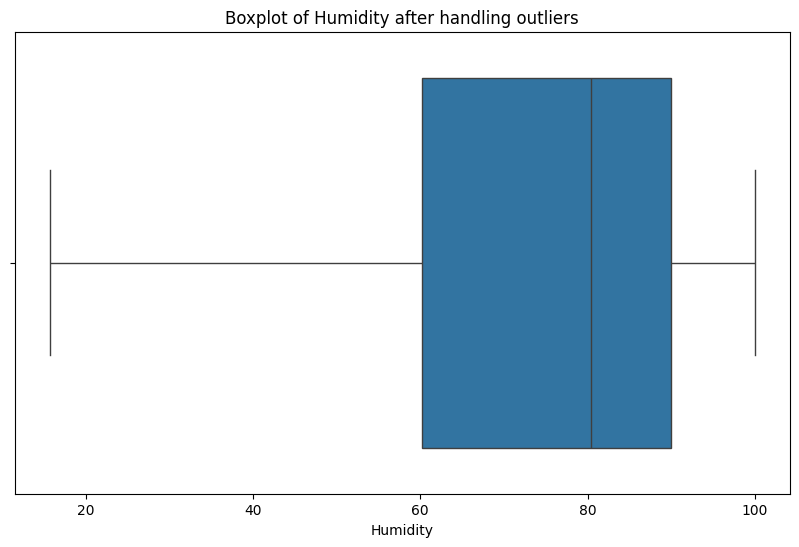

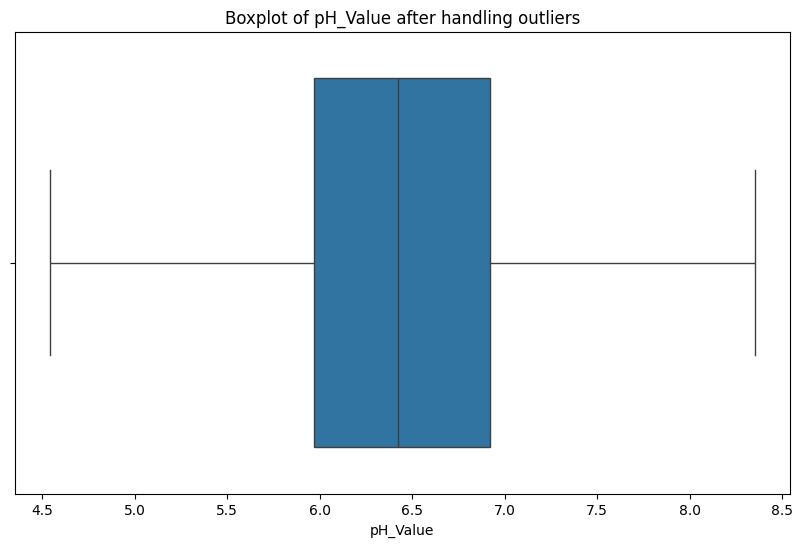

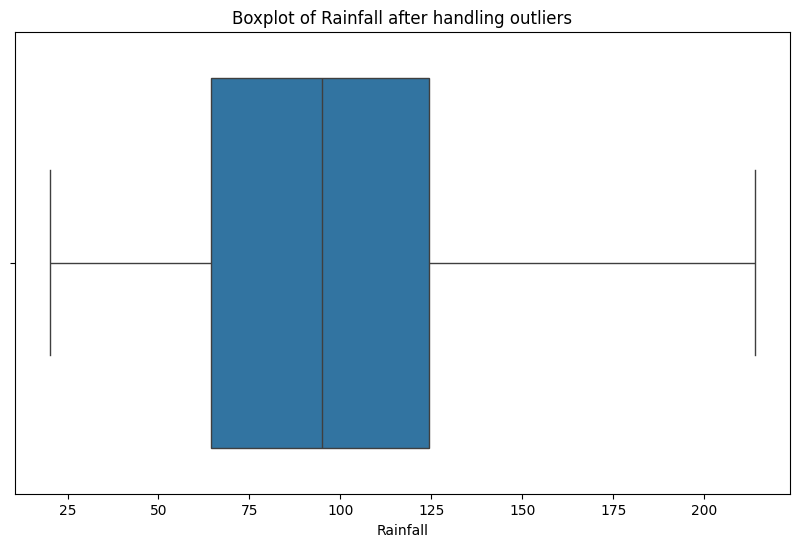

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize boxplots for each relevant column after capping outliers
for column in ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} after handling outliers')
    plt.show()

In [11]:
# Check the dataset after capping outliers
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   float64
 1   Phosphorus   2200 non-null   float64
 2   Potassium    2200 non-null   float64
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(7), object(1)
memory usage: 137.6+ KB


### 2.4. Correct Data Types

**Explanation:**
Ensure that all columns have the correct data types. Convert columns to appropriate data types if necessary.

In [12]:
# Convert columns to appropriate data types if necessary
# Convert 'Nitrogen', 'Phosphorus', and 'Potassium' columns from string to integer (if they were incorrectly loaded)
df['Nitrogen'] = df['Nitrogen'].astype('int64')
df['Phosphorus'] = df['Phosphorus'].astype('int64')
df['Potassium'] = df['Potassium'].astype('int64')

# Convert 'Temperature', 'Humidity', 'pH_Value', and 'Rainfall' columns from string to float (if they were incorrectly loaded)
df['Temperature'] = df['Temperature'].astype(float)
df['Humidity'] = df['Humidity'].astype(float)
df['pH_Value'] = df['pH_Value'].astype(float)
df['Rainfall'] = df['Rainfall'].astype(float)

# Convert 'Crop' column to category
df['Crop'] = df['Crop'].astype('category')

# Verify the data types of the columns after conversion
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Nitrogen     2200 non-null   int64   
 1   Phosphorus   2200 non-null   int64   
 2   Potassium    2200 non-null   int64   
 3   Temperature  2200 non-null   float64 
 4   Humidity     2200 non-null   float64 
 5   pH_Value     2200 non-null   float64 
 6   Rainfall     2200 non-null   float64 
 7   Crop         2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB
None


<hr style="border:1px solid black">

## Step 3: Exploratory Data Analysis (EDA)

### 3.1. Data Structure

**Explanation:**
Understand the structure of the dataset after preprocessing and cleaning.

In [13]:
# Display the first few rows of the dataset
print(df.head())

   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  213.841241  Rice  
2  213.841241  Rice  
3  213.841241  Rice  
4  213.841241  Rice  


In [14]:
# Check the dimensions of the dataset (rows, columns)
print(f'Dataset dimensions: {df.shape}')

Dataset dimensions: (2200, 8)


In [15]:
# Check the column names and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Nitrogen     2200 non-null   int64   
 1   Phosphorus   2200 non-null   int64   
 2   Potassium    2200 non-null   int64   
 3   Temperature  2200 non-null   float64 
 4   Humidity     2200 non-null   float64 
 5   pH_Value     2200 non-null   float64 
 6   Rainfall     2200 non-null   float64 
 7   Crop         2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB
None


### 3.2. Summary statistics

**Explanation:**
Perform summary statistics on both the numerical and categorical columns on the dataset after preprocessing and cleaning.

In [16]:
# Get summary statistics for numerical columns
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,52.743182,38.330909,25.588740,71.493347,6.464205,101.986465
std,36.917334,31.427156,23.355616,4.738804,22.234536,0.730288,51.165743
min,0.000000,5.000000,5.000000,14.080956,15.731726,4.543768,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,128.000000,92.000000,37.250073,99.981876,8.351567,213.841241


In [17]:
# Summary statistics for categorical columns
df.describe(include=['object', 'category'])

,Crop
count,2200
unique,22
top,Apple
freq,100


### 3.3. Univariate analysis

**Explanation:**
Perform summary statistics on both the numerical and categorical columns on the dataset after preprocessing and cleaning.

          Nitrogen   Phosphorus    Potassium  Temperature     Humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    52.743182    38.330909    25.588740    71.493347   
std      36.917334    31.427156    23.355616     4.738804    22.234536   
min       0.000000     5.000000     5.000000    14.080956    15.731726   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   128.000000    92.000000    37.250073    99.981876   

          pH_Value     Rainfall  
count  2200.000000  2200.000000  
mean      6.464205   101.986465  
std       0.730288    51.165743  
min       4.543768    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       8.351567   213.841241  


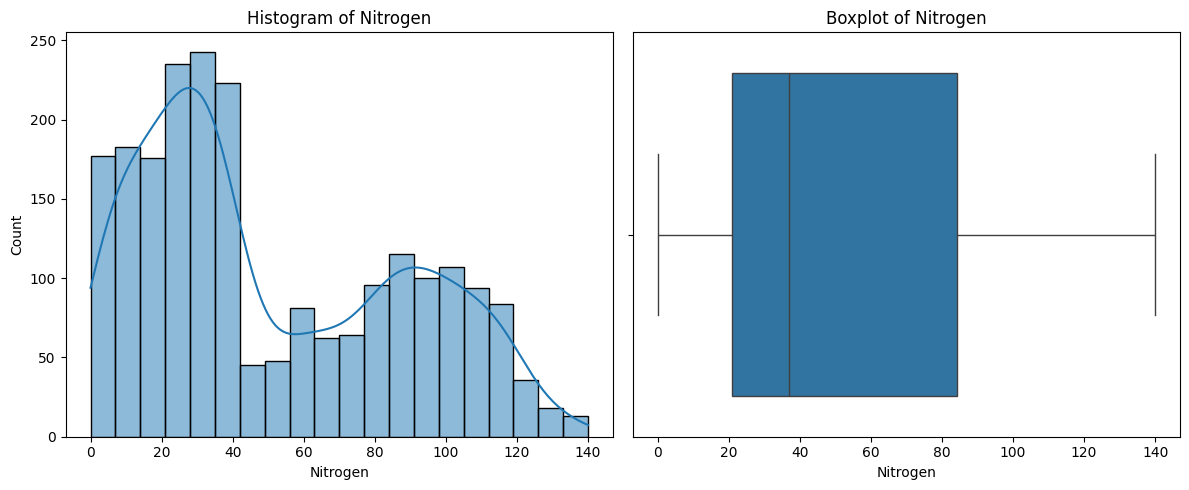

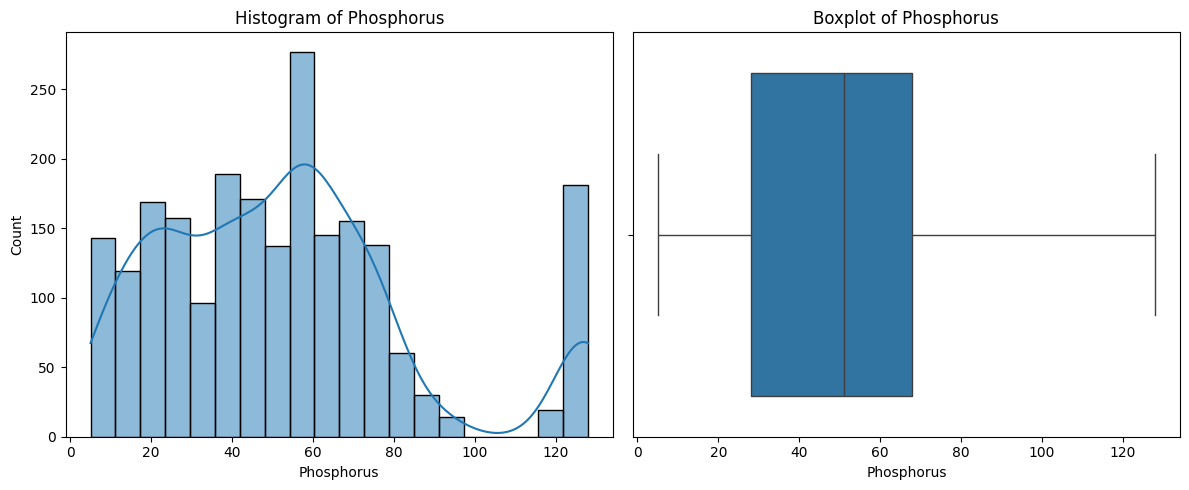

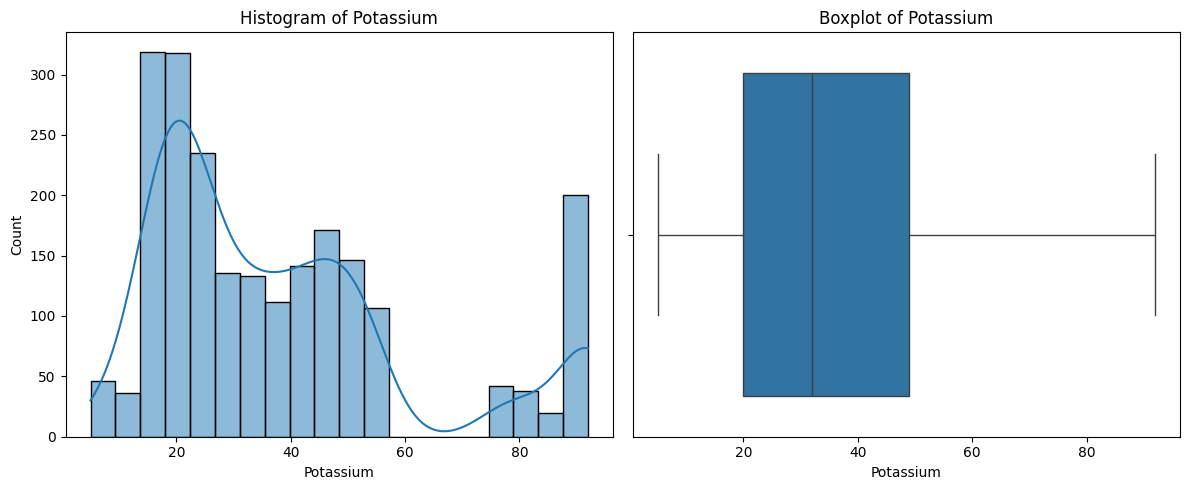

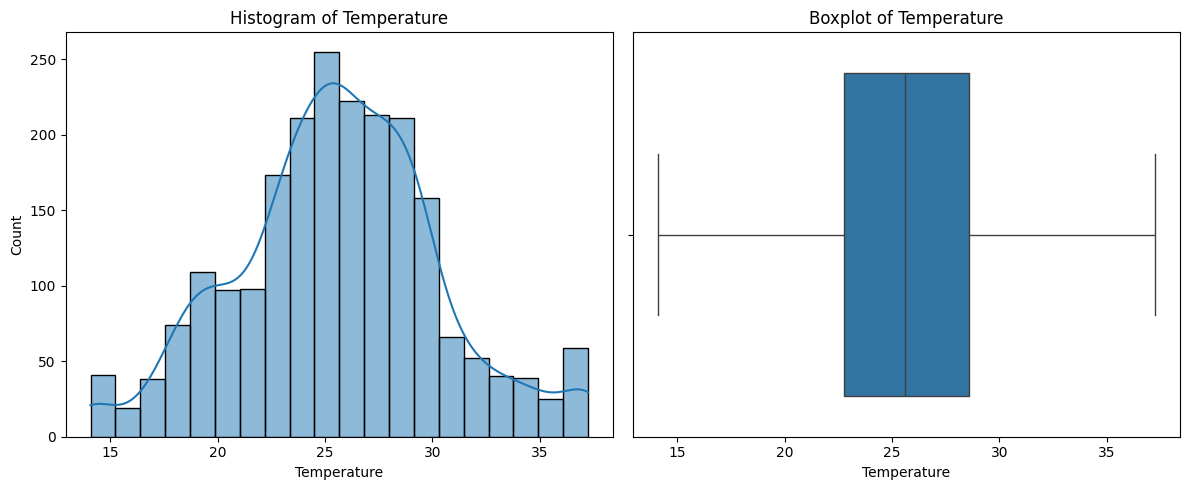

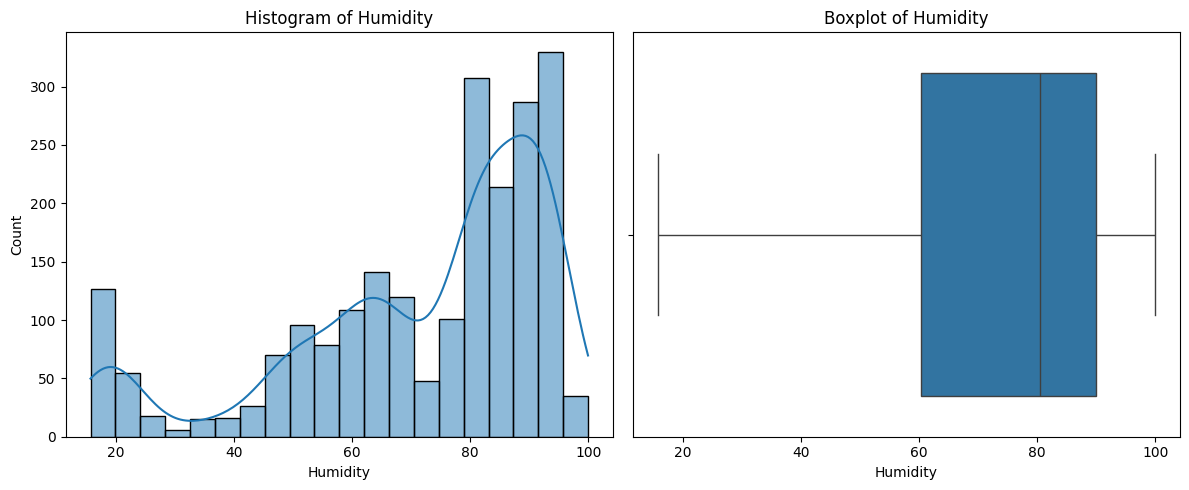

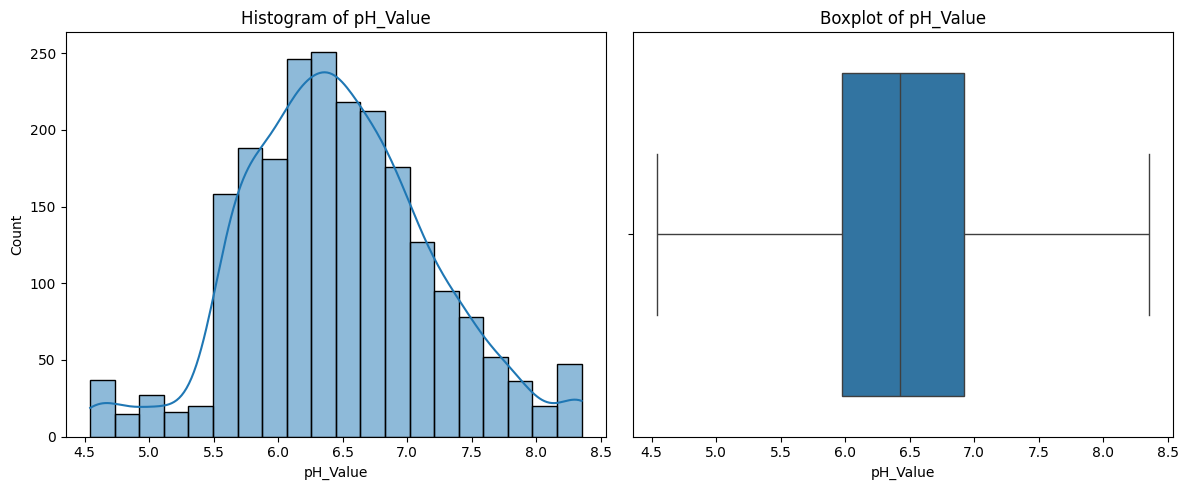

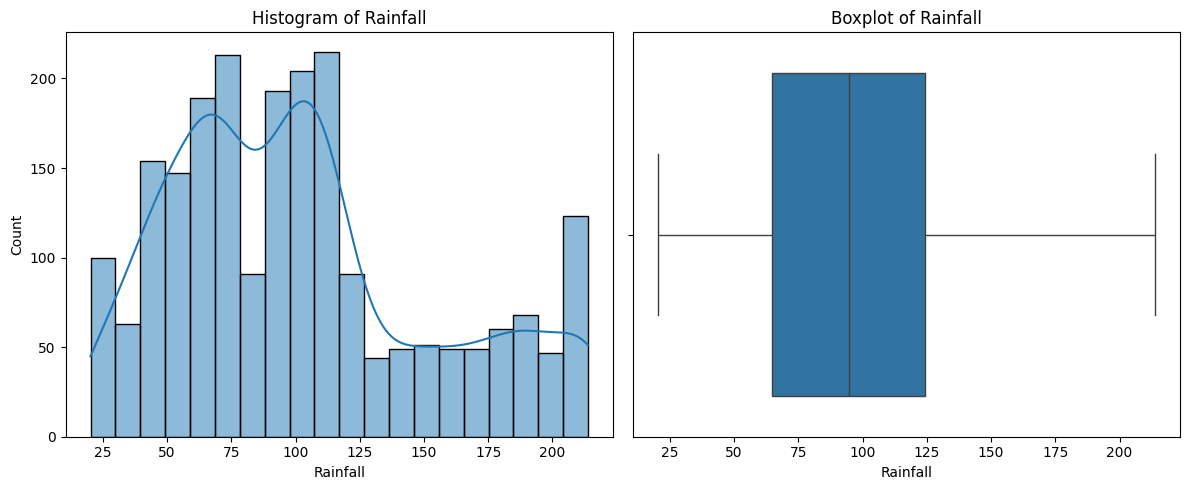

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns
numerical_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

# Display summary statistics for numerical columns
print(df[numerical_columns].describe())

# Visualizing numerical columns
# Histogram and boxplot for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    
    plt.tight_layout()
    plt.show()

         Crop
count    2200
unique     22
top     Apple
freq      100


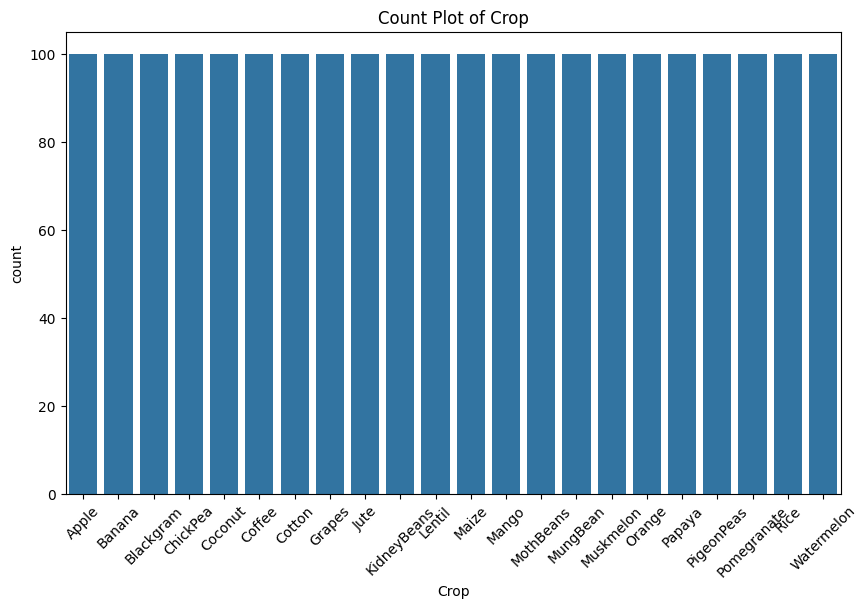

In [19]:
# List of categorical columns
categorical_columns = ['Crop']

# Display summary statistics for categorical columns
print(df[categorical_columns].describe())

# Count plot for each categorical column
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)
    plt.show()

### 3.4. Bivariate Analysis

**Explanation:**
Bivariate analysis examines the relationship between two variables. We will look at relationships between numerical and categorical variables. We'll first look at how we can use scatter plots for bivariate analysis between numerical columns, then we'll see how we can use box plots to compare numerical columns across different categories in categorical columns.

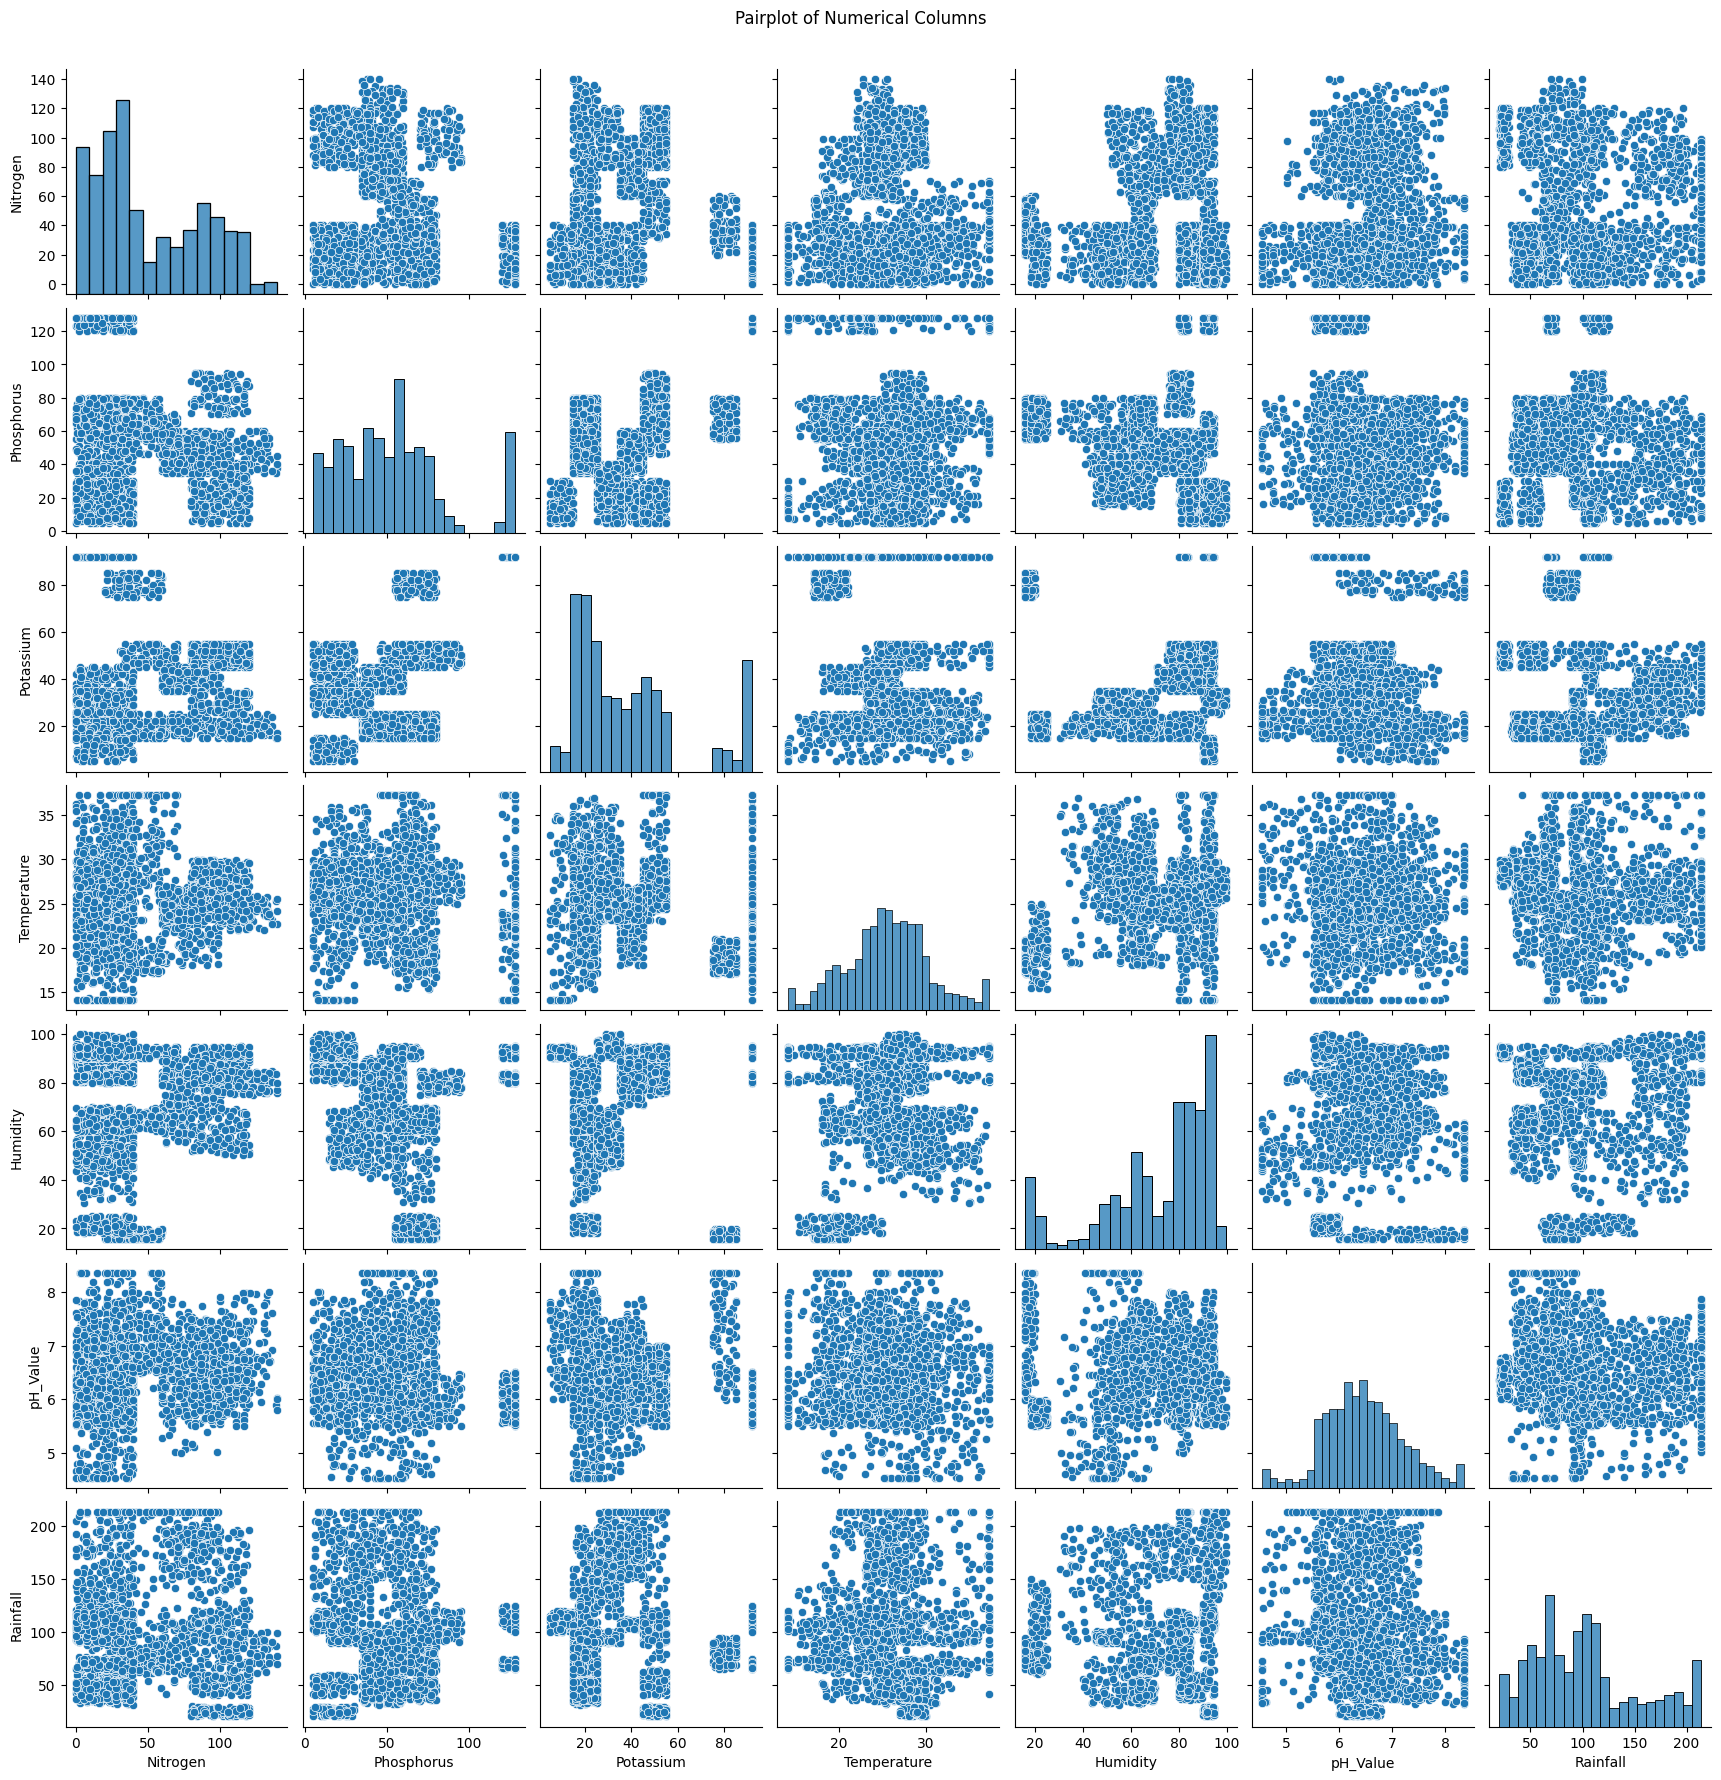

In [20]:
# Scatter plot between each pair of numerical columns
sns.pairplot(df[numerical_columns])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

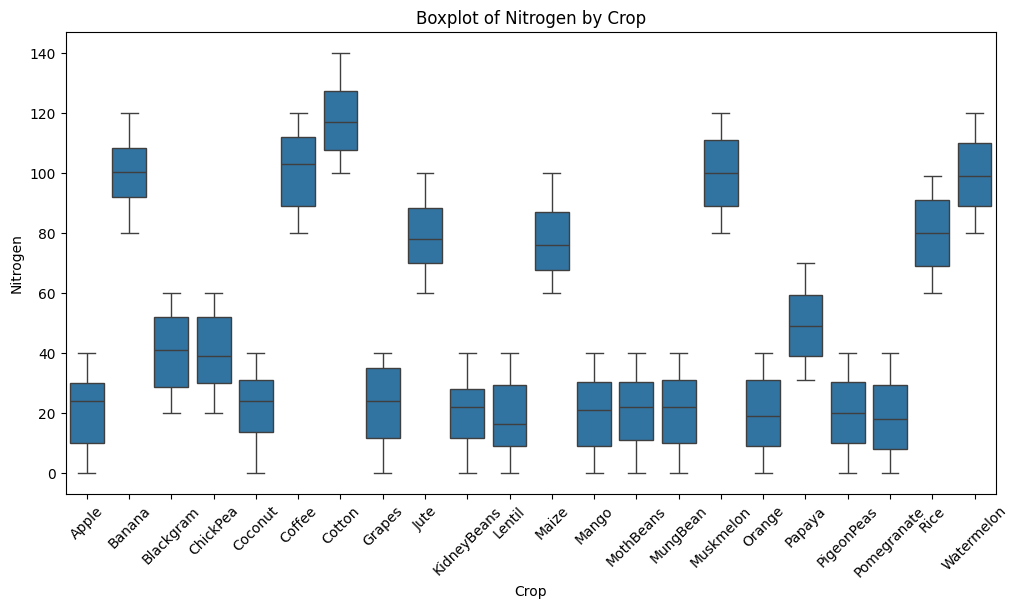

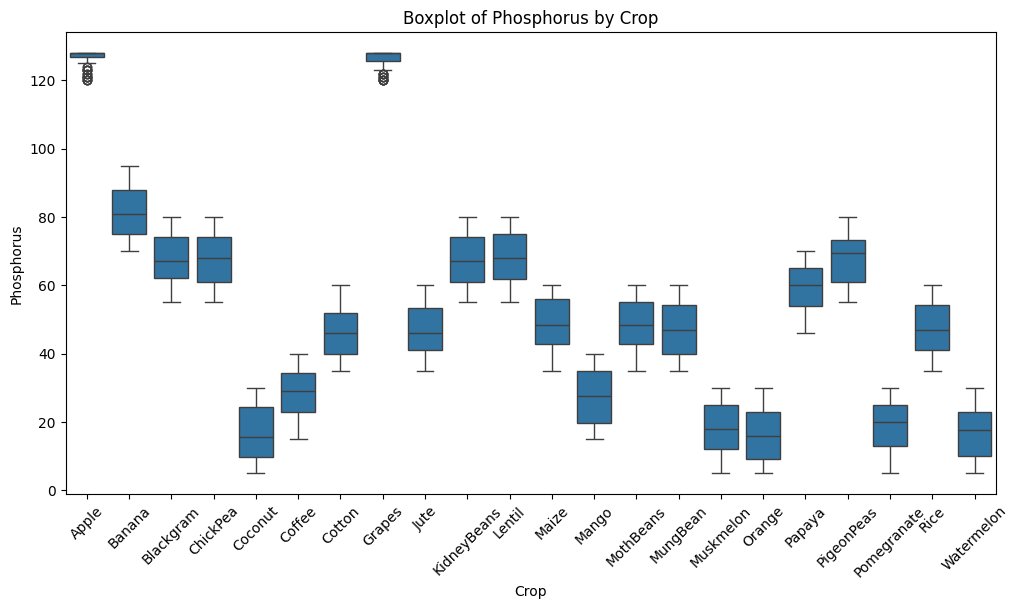

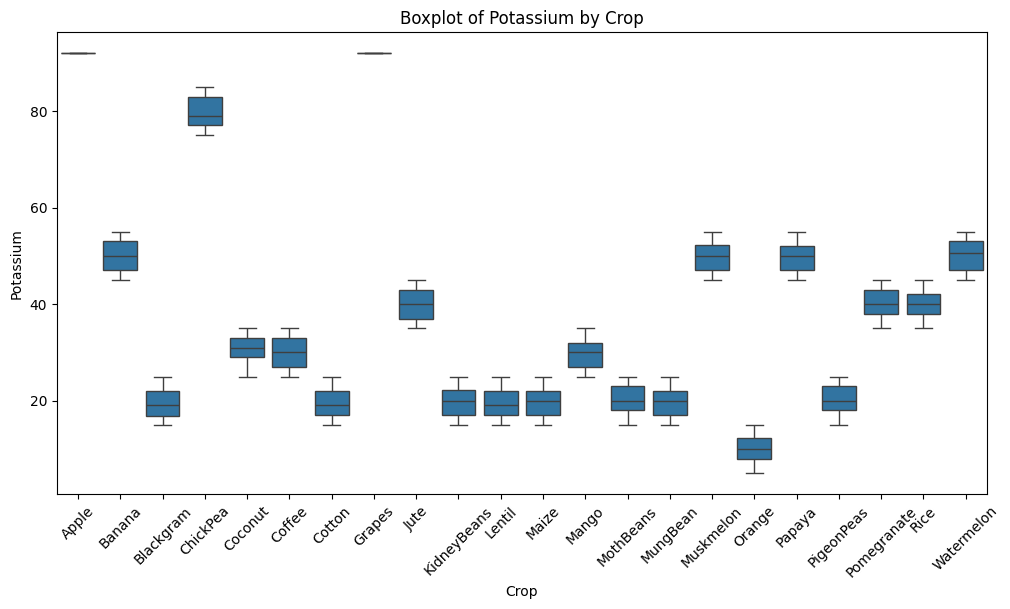

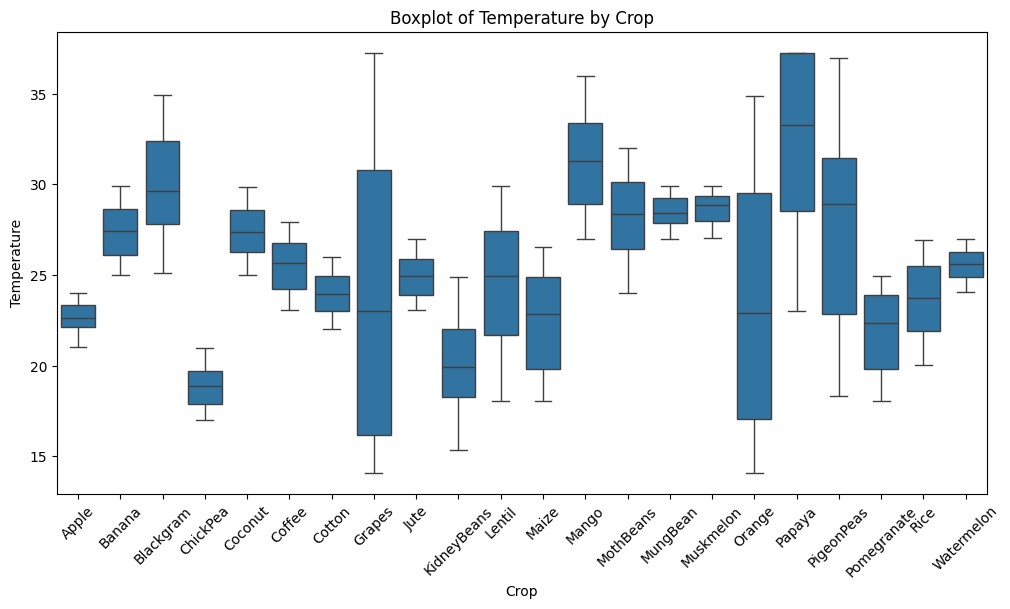

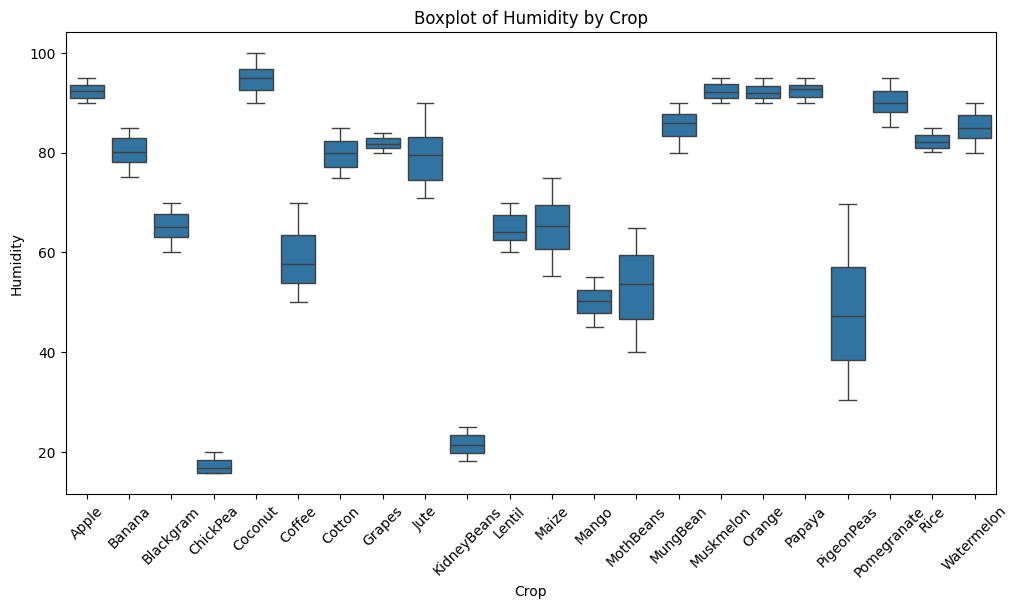

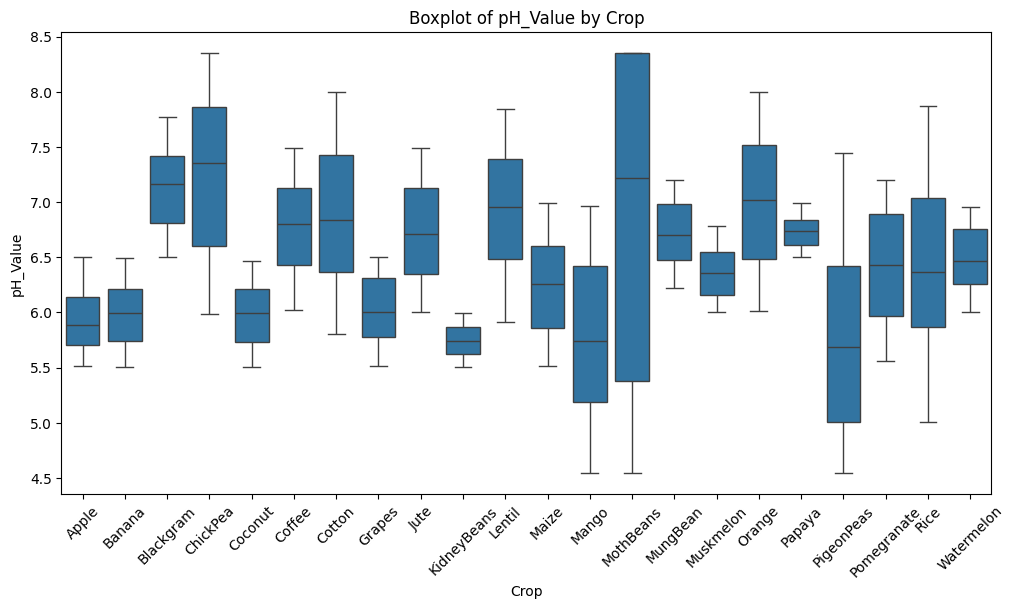

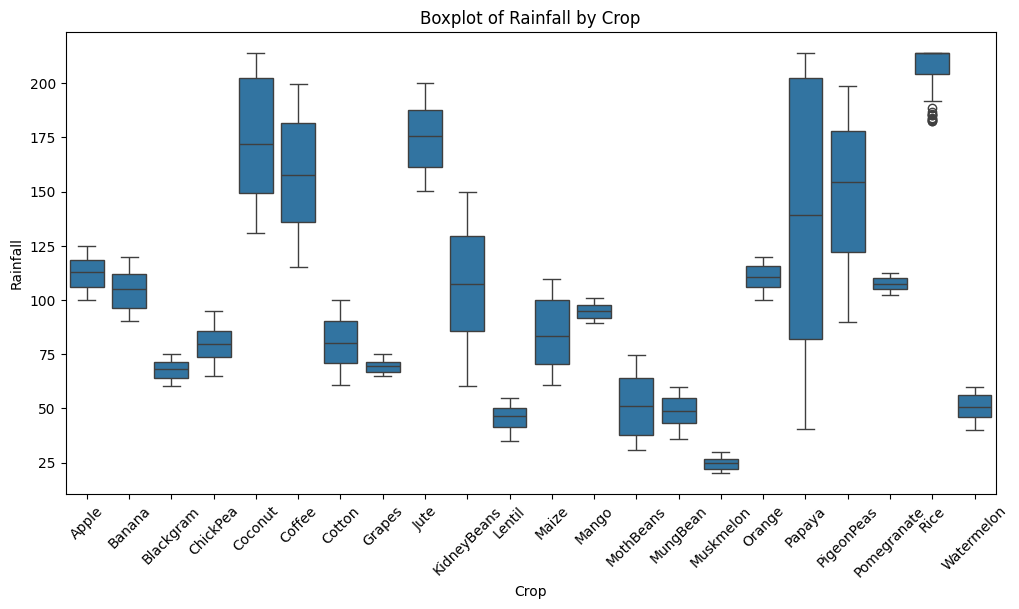

In [21]:
# Box plot of numerical columns across the categorical column 'Crop'
for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Crop', y=column, data=df)
    plt.title(f'Boxplot of {column} by Crop')
    plt.xticks(rotation=45)
    plt.show()

### 3.5. Correlation Analysis

**Explanation:**
Correlation analysis examines the linear relationship between numerical variables. We use a heatmap to visualize the correlation matrix.

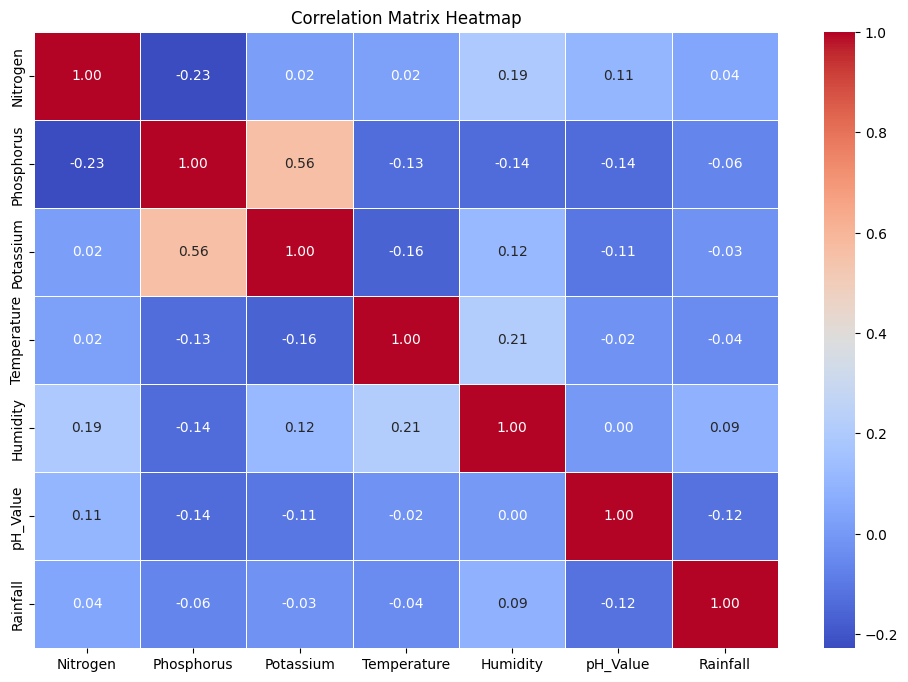

In [22]:
# Compute pairwise correlation of numerical columns
correlation_matrix = df[numerical_columns].corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### 3.5. Assessing Predictor Variable strength

**Explanation:**
We assess the predictive power of the predictor variables using the eta_squared method. This is important in determining which features to use for model building.

In [23]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


# Function to calculate eta squared
def eta_squared(x, y):
    """
    Calculate eta squared for a numerical variable x and a categorical variable y.

    Args:
    x (pd.Series): Numerical predictor variable.
    y (pd.Series): Categorical target variable.

    Returns:
    float: Eta squared value.
    """
    model = ols(f'{x.name} ~ C({y.name})', data=pd.DataFrame({x.name: x, y.name: y})).fit()
    anova_table = anova_lm(model, typ=2)
    eta_sq = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0] + anova_table['sum_sq'][1])
    return eta_sq

# List of numerical columns
numerical_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

# Target categorical column
target_column = 'Crop'

# Calculate eta squared for each numerical column
eta_squared_values = {}
for column in numerical_columns:
    eta_sq = eta_squared(df[column], df[target_column])
    eta_squared_values[column] = eta_sq

# Display eta squared values
print("Eta Squared values for numerical predictors with respect to the target categorical variable:")
for column, eta_sq in eta_squared_values.items():
    print(f'{column}: {eta_sq:.4f}')


Eta Squared values for numerical predictors with respect to the target categorical variable:
Nitrogen: 0.8964
Phosphorus: 0.9476
Potassium: 0.9840
Temperature: 0.5235
Humidity: 0.9677
pH_Value: 0.4029
Rainfall: 0.8615


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2580\3580486017.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_sq = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0] + anova_table['sum_sq'][1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2580\3580486017.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eta_sq = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0] + anova_table['sum_sq'][1])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2580\3580486017.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

### 3.6. Checking for Multicollinearity

**Explanation:**
We assess whether there is multicollinearity between the predictor variables by calculating the VIF. Variance Inflation Factor (VIF) is a measure of multicollinearity among the predictor variables in a regression model. High VIF values indicate a high level of multicollinearity, which can be problematic for regression models.

In [24]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# List of predictor variables (exclude the target variable)
predictor_columns = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']

# Function to calculate VIF scores
def calculate_vif(df, predictor_columns):
    """
    Calculate VIF scores for the given predictor columns in a DataFrame.

    Args:
    df (pd.DataFrame): DataFrame containing the predictor variables.
    predictor_columns (list): List of column names to calculate VIF for.

    Returns:
    pd.DataFrame: DataFrame with predictor columns and their corresponding VIF scores.
    """
    X = df[predictor_columns]
    X['Intercept'] = 1  # Add intercept for VIF calculation
    vif_data = pd.DataFrame()
    vif_data['Feature'] = predictor_columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1] - 1)]
    return vif_data

# Calculate VIF scores
vif_scores = calculate_vif(df, predictor_columns)

# Display VIF scores
print("VIF scores for predictor variables:")
print(vif_scores)

VIF scores for predictor variables:
       Feature       VIF
0     Nitrogen  1.118997
1   Phosphorus  1.672713
2    Potassium  1.629243
3  Temperature  1.097245
4     Humidity  1.171840
5     pH_Value  1.049992
6     Rainfall  1.033986


<hr style="border:1px solid black">

## Step 4: Preliminary EDA Findings and Recommendations

### 4.1. Univariate Analysis

1. A number of numerical columns exhibit skewness:
   - **Positive/Right Skewed** columns:
     - Nitrogen
     - Phosphorus
     - Potassium
     - Rainfall
   - **Negative/Left Skewed** column:
     - Humidity
   - **Normal (Bell-Shaped) Distribution** columns:
     - Temperature
     - pH value

   The skewness in a majority of the columns may inhibit the use of statistical models as most of them assume a normal distribution.

2. The categorical column (Crop) exhibits a uniform distribution, with all 22 categories having a frequency of 100.
equency of 100.


### 4.2. Bivariate Analysis

1. The scatter plots seem to show no discernable patterns or trends between the numerical columns/variables.
2. The eta_square scores show that all predictor variables have a significant relationship with the target variable, so all predictor variables are useful.
3. The heatmap indicates that Nitrogen and Phosphorus have a positive correlation indicating a strong linear relationship between the two.
4. However, the  VIF scores indicate that there's insignificant multicollinearity, so all predictor variables are useful.

### 4.3. Recommendations

1. The skewness in a majority of the dataset indicates the need to transform the data (through normalizing/standardizing it) before implementing it into a model.
2. The eta_square scores that the dataset is suitable for a Logistic Regression model.
3. I will also use a Random Forest classifier to compare model performance and choose the best-performing model before deployment.

## Step 5: Reworking my dataset

**Explanation:**
We will rework this dataset to ready it for model training and testing by standardizing the numerical columns and encoding the categorical column

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define predictor and target variables
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall']]
y = df['Crop']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Encode the categorical target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert back to DataFrame for easier inspection (optional)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
y_train_encoded_df = pd.DataFrame(y_train_encoded, columns=['Crop'])
y_test_encoded_df = pd.DataFrame(y_test_encoded, columns=['Crop'])

# Display the first few rows of the preprocessed training set
print("Preprocessed Training Features:")
print(X_train_scaled_df.head())

print("\nPreprocessed Training Target:")
print(y_train_encoded_df.head())

Preprocessed Training Features:
   Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  Rainfall
0 -0.903427   -1.163361  -1.030283    -1.924867  0.937080  0.213306  0.034857
1 -0.367051    0.830325  -0.816833     0.417449 -0.100914  0.920562 -0.621888
2 -1.171614    0.640450  -0.560694     0.412828 -0.383474  1.117176 -1.095820
3  1.349349    0.545513   0.421175    -0.041293  0.157478 -0.622792  0.301371
4 -1.359346   -1.131715  -0.347244     2.083883 -1.072625 -0.259293 -0.066066

Preprocessed Training Target:
   Crop
0    16
1     2
2    10
3     1
4    12


In [26]:
# Combine the feature and target DataFrames
training_set_df = pd.concat([X_train_scaled_df, y_train_encoded_df], axis=1)

# Display the first few rows of the combined DataFrame
print("Preprocessed Training Set:")
training_set_df.head()

Preprocessed Training Set:


,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,-0.903427,-1.163361,-1.030283,-1.924867,0.937080,0.213306,0.034857,16
1,-0.367051,0.830325,-0.816833,0.417449,-0.100914,0.920562,-0.621888,2
2,-1.171614,0.640450,-0.560694,0.412828,-0.383474,1.117176,-1.095820,10
3,1.349349,0.545513,0.421175,-0.041293,0.157478,-0.622792,0.301371,1
4,-1.359346,-1.131715,-0.347244,2.083883,-1.072625,-0.259293,-0.066066,12


## Step 6: Building and Training the Models

### 6.1. Logistic Regression

**Explanation:**
This step involves training a Logistic Regression model to predict the target variable, then evaluating the model performance.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(multi_class='multinomial', random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [28]:
# Evaluate the model
print("Logistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_log_reg))

Logistic Regression Model Performance:
Accuracy: 0.9636363636363636
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.83      0.87      0.85        23
           9       0.90      0.95      0.93        20
          10       0.85      1.00      0.92        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00

### 6.2. Random Forest Classifier

**Explanation:**
Next step is to train a Random Forest Classifier model to predict the target variable, then evaluating the model performance.

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_clf.fit(X_train_scaled, y_train_encoded)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test_scaled)

In [30]:
# Evaluate the model
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_rf))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_pred_rf))

Random Forest Model Performance:
Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00      

<hr style="border:1px solid black">


## Step 7: Model Evaluation and Performance Comparison

Both the Logistic Regression and Random Forest models have performed remarkably well on the dataset, with high accuracy and strong performance metrics. However, a more detailed comparison can help in selecting the best model.

### Logistic Regression Model Performance:
- **Accuracy:** 0.9636
- **Precision, Recall, F1-Score:** The model achieves perfect scores (1.00) for many classes but has lower precision and recall for some classes, such as class 8 (Precision: 0.83, Recall: 0.87) and class 20 (Precision: 0.88, Recall: 0.79).
- **Confusion Matrix:** Shows that the model confuses some classes slightly, such as misclassifying instances of class 20 into other classes.

### Random Forest Model Performance:
- **Accuracy:** 0.9932
- **Precision, Recall, F1-Score:** The Random Forest model achieves near-perfect scores across almost all classes. The lowest performance is for class 20 with a recall of 0.89, but even this is still quite high.
- **Confusion Matrix:** Demonstrates very few misclassifications, indicating strong predictive power and robustness.

### Comparison and Evaluation:
- **Accuracy:** The Random Forest model has a higher accuracy (0.9932) compared to the Logistic Regression model (0.9636).
- **Precision, Recall, F1-Score:** Random Forest generally has higher or equivalent precision, recall, and F1-scores across all classes compared to Logistic Regression. This indicates better overall performance and fewer misclassifications.
- **Confusion Matrix Analysis:** The Random Forest model shows fewer misclassifications in its confusion matrix compared to Logistic Regression, highlighting its ability to better distinguish between different classes.

### Detailed Notes:
**Logistic Regression:**
- **Advantages:** Simplicity, interpretability, and less prone to overfitting.
- **Disadvantages:** Lower performance in multiclass classification problems compared to more complex models.
- **Suitability:** May be more suitable if interpretability and simplicity are priorities.

**Random Forest:**
- **Advantages:** Higher accuracy, robustness, and ability to handle complex relationships and interactions within the data.
- **Disadvantages:** More computationally intensive, less interpretable compared to Logistic Regression.
- **Suitability:** Preferred for achieving the highest predictive performance and when dealing wit
### Conclusion:
Based on the performance metrics, confusion metrics analysis, and overall evaluation, the **Random Forest model** is the better choice due to its higher accuracy and better performance across all evaluated metrics. It demonstrates superior capability in correctly classifying the instances with minimal errors, making it the best model for this particular dataset and classification problem.

et and classification problem.


<hr style="border:1px solid black">

## Step 8: Model Testing and Deployment

### Step 8.1: Model Saving

**Explanation:**
Save the trained model to disk using a library like joblib or pickle. This allows you to load and use the model without retraining it each time.

In [31]:
import joblib

# Save the Random Forest model to disk
joblib.dump(rf_clf, 'random_forest_model.pkl')


['random_forest_model.pkl']

### Step 8.2: Testing on Unseen Data

**Explanation:**
Ensure that the model performs well on completely unseen data (not used in training or validation). This step can involve using a separate test set or cross-validation.

In [32]:
# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Predict on the test set
y_pred_test = loaded_model.predict(X_test_scaled)

# Evaluate the performance on the test set
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)
test_classification_report = classification_report(y_test_encoded, y_pred_test)
test_confusion_matrix = confusion_matrix(y_test_encoded, y_pred_test)

print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:")
print(test_classification_report)
print("Test Confusion Matrix:")
print(test_confusion_matrix)

Test Accuracy: 0.9931818181818182
Test Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       

### Step 8.3: Model Validation

**Explanation:**

**Cross-validation:** This technique splits your training data into multiple folds (often 5 or 10), trains the model on several combinations of these folds, and evaluates its performance on the remaining fold. This helps in assessing how well the model generalizes to different subsets of the data.

In [33]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)

# Perform cross-validation
cv_scores = cross_val_score(rf_clf, X_train_scaled, y_train_encoded, cv=5)  # Adjust cv as needed

# Print cross-validation scores
print("Cross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation Scores: [0.98579545 1.         0.99431818 0.99715909 0.99715909]
Mean CV Accuracy: 0.9948863636363636
